# **Object simulation**
We will now proceed to simulate the propagation of the wavefront generated by a given object placed along the optical axis.

First, we will analyze how the object propagates on its own, without placing any gratings.

Any object can be defined by its transfer function, which is determined by its geometry and refractive index as follows:
$$T\left(x,y\right) = e^{-\mu\left(x,y\right)+i\phi\left(x,y\right)}$$
If we define the refractive index as:
$$n =1-\delta+i\beta$$
it can be shown that the attenuation term in the transfer function equation is related to $\beta$ as:
$$\mu\left(x,y\right) = \frac{4\pi}{\lambda}\int{\beta\left(x,y\right)dl}$$
where $\lambda$ is the wavelength, and the integral is a line integral along the optical axis through the thickness of the object.

On the other hand, $\phi$ is related to the real part of the refractive index:
$$\phi\left(x,y\right) = -\frac{2\pi}{\lambda}\int{\delta\left(x,y\right)dl}$$

We define the propagator as:
$$H\left(k\right)=e^{iz\sqrt{k^2-k^2_\perp}}$$
The propagated wave function can then be written as:
$$\Phi = H\left(k\right)\cdot F\left[T\left(x,y\right)\right]$$
where $F\left[T\left(x,y\right)\right]$ denotes the Fourier transform of $T\left(x,y\right)$.


# Objects Available
For now, simulations can be performed with a Sphere, Cylinder (hollow or solid) and Wedges.

Energies: 100%|██████████| 59/59 [00:39<00:00,  1.49it/s]


Execution time: 40.034 seconds


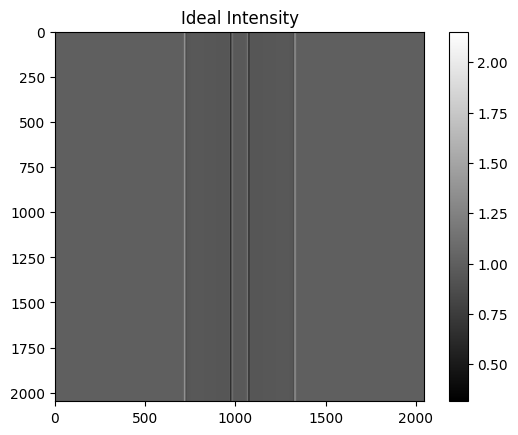

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.path.abspath(''), os.pardir)))
import src.PCSim.experiments as exp
import src.PCSim.Geometry as geom
import src.PCSim.Objects as obj
import src.PCSim.source as source
import src.PCSim.utils as utils
import src.PCSim.detector as detector
import  os, time

start = time.time()

energy = 20 # keV
n = 2048
DSD = 40.1
DOD = 0.1 #cm
pixel_size = 1
Beam_distribution = 'Plane'
detector_pixel_size = 10 # micron
detector_FWHM = 10 # microns

# Spectra example: "AAPM_Mo_Mo"

MyGeometry = geom.Geometry(DSD)
MySource = source.Source((0.1,0.1),'AAPM_Mo_Mo', energy, Beam_distribution, pixel_size)
MyObject1 = obj.Cylinder(n, outer_radius=300, inner_radius=50,Orientation='Vertical',pixel_size=pixel_size, material='PMMA', DSO = 10, x_shift_px=0, y_shift_px=0)
#MyObject2 = obj.Cylinder(n, outer_radius=60, inner_radius=30,Orientation='Vertical',pixel_size=pixel_size, material='Au', DSO = 40, x_shift_px=300, y_shift_px=0)
#MyObject = obj.Cylinder(n, 100, pixel_size, 'PMMA', 0, 0, 'Vertical', DSO=40,inner_radius=40)
MyDetectorIdeal = detector.Detector('Ideal', detector_pixel_size, detector_FWHM, 'gaussian', pixel_size)
MyDetectorRealistic = detector.Detector('Realistic', detector_pixel_size, detector_FWHM, 'gaussian', pixel_size)
Sample = [MyObject1]


Intensity = exp.Experiment_Inline(n, MyGeometry, MySource, MyDetectorIdeal,Sample)

end = time.time()

print(f"Execution time: {end - start:.3f} seconds")

#Intensity_detector = utils.convolve(PSF_detector, Intensity)
#Intensity_detector = MyDetector.downsample_image(Intensity)

#Intensity_detector = MyDetectorRealistic.applyDetector(Intensity, gaussian_sigma=0.1)

plt.imshow(Intensity,  'gray')
plt.title('Ideal Intensity')
plt.colorbar()
plt.show()

#plt.imshow(Intensity_detector,  'gray')
#plt.title('Intensity Detector')
#plt.colorbar()
#plt.show()

#plt.plot(Intensity_detector[n//2, :])
#plt.show()

#np.savetxt('Sphere_AAPM.txt', Intensity_detector[:,200])

#im = Image.fromarray(Intensity_detector)
#im.save('Cyl_Analytic_10cm.tif')

Energies: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]


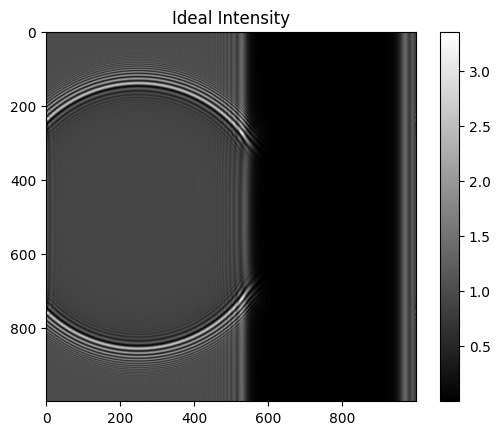

In [2]:
# More than one object

import matplotlib.pyplot as plt
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.path.abspath(''), os.pardir)))
import src.PCSim.experiments as exp
import src.PCSim.Geometry as geom
import src.PCSim.Objects as obj
import src.PCSim.detector as det
import src.PCSim.source as source
import src.PCSim.utils as utils

n = 1000 
DOD = 1000
DSO = 1000
DSD = 1500
pixel_size = 1
Beam_distribution = 'Plane'
detector_pixel_size = 1
detector_FWHM = 20
energy = 20

MyGeometry = geom.Geometry(DSD)
MySource = source.Source((0.1,0.1),'Mono', energy, Beam_distribution, pixel_size)
MyDetector = det.Detector('Ideal', detector_pixel_size, detector_FWHM, 'gaussian', pixel_size)


MyObject1 = obj.Sphere(n, 350, pixel_size, 'H2O', 1000, -n//2, 0)
MyObject2 = obj.Cylinder(n, outer_radius=200, inner_radius=0,Orientation='Vertical',pixel_size=pixel_size, material='Au', DSO = 500, x_shift_px=n//2, y_shift_px=0)

Sample = [MyObject1, MyObject2]
Intensity = exp.Experiment_Inline(n, MyGeometry, MySource, MyDetector, Sample, padding=n//4)


plt.imshow(Intensity,  'gray')
plt.title('Ideal Intensity')
plt.colorbar()
plt.show()




## Pure Phase and Pure Absorption Object
We can simulate a Pure Phase and a Pure Absorption Object.


/tmp/ipykernel_882756/1866643247.py:31: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(hspace=-0.47, wspace=0.05)
Energies: 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]


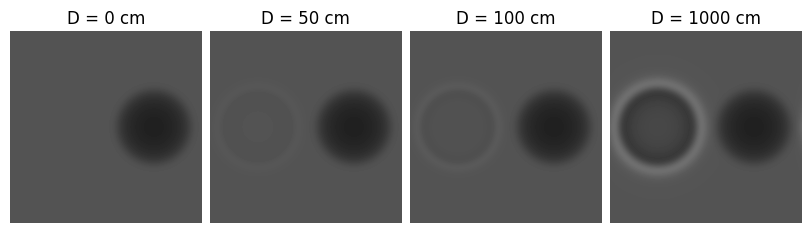

In [3]:
# More than one object

import matplotlib.pyplot as plt
import numpy as np
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.path.abspath(''), os.pardir)))
import src.PCSim.experiments as exp
import src.PCSim.Geometry as geom
import src.PCSim.Objects as obj
import src.PCSim.detector as detector
import src.PCSim.source as source
import src.PCSim.utils as utils

n = 1000

DSD = 2000
pixel_size = 1
Beam_distribution = 'Plane'
detector_pixel_size = 1
detector_FWHM = 1

MyGeometry = geom.Geometry(DSD)
MySource = source.Source((50,50),'Mono', 25, Beam_distribution, pixel_size)
MyDetector = detector.Detector('Ideal', detector_pixel_size, detector_FWHM, 'gaussian', pixel_size)
MyDetectorRealistic = detector.Detector('Realistic', detector_pixel_size, detector_FWHM, 'gaussian', pixel_size)
distances = [0, 50,100, 1000]
i = 0
j = len(distances)
fig, ax = plt.subplots(1, j, figsize = (8,8), constrained_layout=True)
#fig.tight_layout()
fig.subplots_adjust(hspace=-0.47, wspace=0.05)

for prop_distance in distances:
    MyObject1 = obj.Sphere(n, 200, pixel_size, 'Pure_Phase', DSD-prop_distance, -n//2, 0)
    MyObject2 = obj.Sphere(n, 200, pixel_size, 'Pure_Absorption', DSD-prop_distance, +n//2, 0)
    Sample = [MyObject1, MyObject2]
    Intensity = exp.Experiment_Inline(n, MyGeometry, MySource, MyDetector, Sample, padding=n//2)
    #Intensity_detector = MyDetectorRealistic.applyDetector(Intensity, current_pixel_size=detector_pixel_size)

    im1 = ax[i].imshow(Intensity,  'gray', vmin=0.45, vmax = 2.13)
    ax[i].title.set_text(f'D = {prop_distance} cm')
    ax[i].axis('off')
    
    i +=1

plt.show()
